In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dengue_features_train.csv')
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
df.shape

(1456, 24)

In [4]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [5]:
missing_percentage = (df.isna().sum()/ df.shape[0]).sort_values(ascending=False).reset_index()
missing_percentage.columns = ('feature', 'missing_percentage')
missing_percentage.head()

,feature,missing_percentage
0,ndvi_ne,0.133242
1,ndvi_nw,0.035714
2,station_diur_temp_rng_c,0.029533
3,station_avg_temp_c,0.029533
4,station_precip_mm,0.015110


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

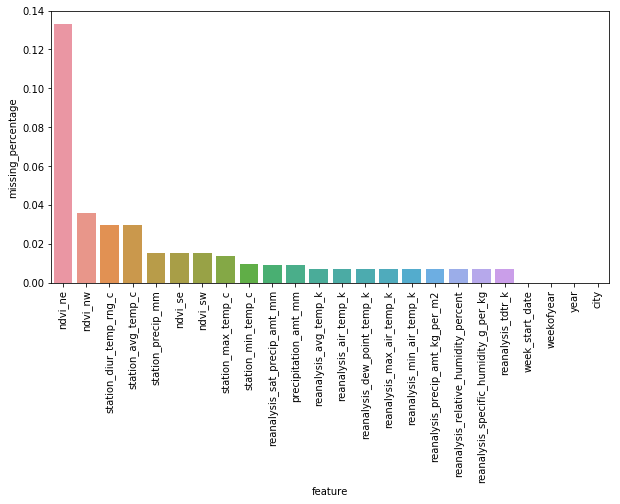

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(data=missing_percentage, x='feature', y='missing_percentage')
plt.xticks(rotation=90)

In [7]:
df.corr()['ndvi_ne'].abs().sort_values(ascending=False)

ndvi_ne                                  1.000000
ndvi_nw                                  0.850902
reanalysis_tdtr_k                        0.673935
ndvi_sw                                  0.669504
station_diur_temp_rng_c                  0.658129
reanalysis_max_air_temp_k                0.634330
reanalysis_min_air_temp_k                0.623116
ndvi_se                                  0.614380
station_max_temp_c                       0.491922
reanalysis_relative_humidity_percent     0.457985
reanalysis_air_temp_k                    0.340976
station_min_temp_c                       0.315696
station_precip_mm                        0.242263
year                                     0.223361
precipitation_amt_mm                     0.205736
reanalysis_sat_precip_amt_mm             0.205736
reanalysis_precip_amt_kg_per_m2          0.199411
station_avg_temp_c                       0.186227
reanalysis_specific_humidity_g_per_kg    0.094852
reanalysis_dew_point_temp_k              0.056077


# Visualizations 

# Extracting features 

In [8]:
ndvi_feature_names = list(filter(lambda s: s.startswith(r'ndvi'), list(df.columns)))
reanalysis_feature_names = list(filter(lambda s: s.startswith(r'reanalysis'), list(df.columns)))
station_feature_names = list(filter(lambda s: s.startswith('station'), list(df.columns)))

ndvi_feature_names, reanalysis_feature_names, station_feature_names

(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'],
 ['reanalysis_air_temp_k',
  'reanalysis_avg_temp_k',
  'reanalysis_dew_point_temp_k',
  'reanalysis_max_air_temp_k',
  'reanalysis_min_air_temp_k',
  'reanalysis_precip_amt_kg_per_m2',
  'reanalysis_relative_humidity_percent',
  'reanalysis_sat_precip_amt_mm',
  'reanalysis_specific_humidity_g_per_kg',
  'reanalysis_tdtr_k'],
 ['station_avg_temp_c',
  'station_diur_temp_rng_c',
  'station_max_temp_c',
  'station_min_temp_c',
  'station_precip_mm'])

In [9]:
numerical_features = ndvi_feature_names + reanalysis_feature_names + station_feature_names
numerical_features

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [10]:
historical_data = df[numerical_features].rolling(10).mean().fillna(method="bfill")

In [11]:
historical_data.columns

Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [12]:
column_rename = lambda name: 'past_' + name
historical_data.columns = map(column_rename, historical_data.columns)

In [13]:
historical_data.shape

(1456, 19)

In [14]:
historical_data.head()

,past_ndvi_ne,past_ndvi_nw,past_ndvi_se,past_ndvi_sw,past_reanalysis_air_temp_k,past_reanalysis_avg_temp_k,past_reanalysis_dew_point_temp_k,past_reanalysis_max_air_temp_k,past_reanalysis_min_air_temp_k,past_reanalysis_precip_amt_kg_per_m2,past_reanalysis_relative_humidity_percent,past_reanalysis_sat_precip_amt_mm,past_reanalysis_specific_humidity_g_per_kg,past_reanalysis_tdtr_k,past_station_avg_temp_c,past_station_diur_temp_rng_c,past_station_max_temp_c,past_station_min_temp_c,past_station_precip_mm
0,0.20776,0.153401,0.189391,0.183838,299.123286,299.230714,295.421,301.32,297.47,26.314,80.290143,29.057,16.840286,2.235714,27.584286,7.12,32.99,22.94,18.79
1,0.20776,0.153401,0.189391,0.183838,299.123286,299.230714,295.421,301.32,297.47,26.314,80.290143,29.057,16.840286,2.235714,27.584286,7.12,32.99,22.94,18.79
2,0.20776,0.153401,0.189391,0.183838,299.123286,299.230714,295.421,301.32,297.47,26.314,80.290143,29.057,16.840286,2.235714,27.584286,7.12,32.99,22.94,18.79
3,0.20776,0.153401,0.189391,0.183838,299.123286,299.230714,295.421,301.32,297.47,26.314,80.290143,29.057,16.840286,2.235714,27.584286,7.12,32.99,22.94,18.79
4,0.20776,0.153401,0.189391,0.183838,299.123286,299.230714,295.421,301.32,297.47,26.314,80.290143,29.057,16.840286,2.235714,27.584286,7.12,32.99,22.94,18.79


In [15]:
X = pd.read_csv('dengue_features_train.csv')
Y = pd.read_csv('dengue_labels_train.csv')
X_new = pd.read_csv('dengue_features_test.csv')

In [16]:
shape_of_df = lambda x: x.shape
list(map(shape_of_df, [X, Y, X_new]))

[(1456, 24), (1456, 4), (416, 24)]

# Trasnform train vectors

In [17]:
def add_historical_values(df):
    historical_data = df[numerical_features].rolling(1).mean().fillna(method="bfill")
    column_rename = lambda name: 'past_' + name
    historical_data.columns = map(column_rename, historical_data.columns)
    return pd.concat([df, historical_data], axis=1)

In [18]:
def handle_missing_values(df):
    return df.fillna(df.mean())

In [19]:
def dummify_cities(df):
    city_features = pd.get_dummies(df['city'], prefix='city')
    df_without_cities = df.drop('city', axis=1)
    return pd.concat([df_without_cities, city_features], axis=1)

In [20]:
def remove_unwanted_features(df):
    features_not_used = ['week_start_date', 'total_cases']
    features_to_use = set(df.columns) - set(features_not_used)
    features_to_use = list(features_to_use)
    return df[features_to_use]

In [21]:
def do_all_transforms(df):
    df = handle_missing_values(df)
    df = add_historical_values(df)
    df = dummify_cities(df)
    df = remove_unwanted_features(df)
    return df

## Seperating test and train datasets

In [22]:
X = do_all_transforms(X)
y = Y['total_cases']

## Correlations

In [23]:
df_with_historical_data = pd.concat([X, y], axis=1)
df_with_historical_data.head(2)

,reanalysis_tdtr_k,past_reanalysis_relative_humidity_percent,station_max_temp_c,station_precip_mm,reanalysis_air_temp_k,past_reanalysis_specific_humidity_g_per_kg,weekofyear,past_reanalysis_max_air_temp_k,ndvi_nw,city_sj,...,past_station_diur_temp_rng_c,reanalysis_precip_amt_kg_per_m2,past_reanalysis_min_air_temp_k,reanalysis_max_air_temp_k,reanalysis_dew_point_temp_k,past_ndvi_ne,past_station_max_temp_c,city_iq,reanalysis_avg_temp_k,total_cases
0,2.628571,73.365714,29.4,16.0,297.572857,14.012857,18,299.8,0.103725,1,...,6.900000,32.00,295.9,299.8,292.414286,0.1226,29.4,0,297.742857,4
1,2.371429,77.368571,31.7,8.6,298.211429,15.372857,19,300.9,0.142175,1,...,6.371429,17.94,296.4,300.9,293.951429,0.1699,31.7,0,298.442857,5


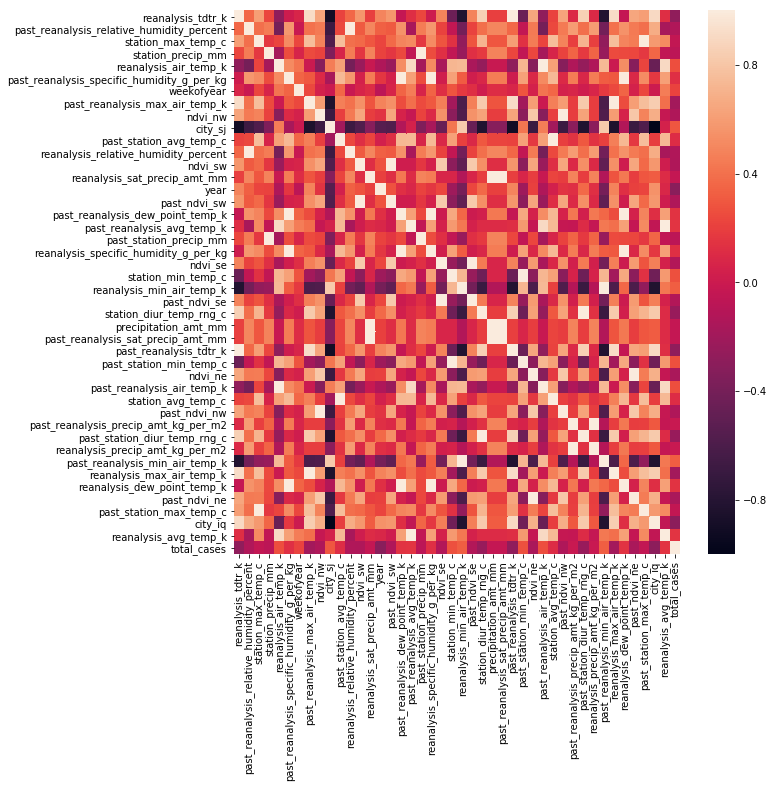

In [24]:
plt.figure(figsize=(10, 10))
corr = df_with_historical_data.corr()
sns.heatmap(corr)

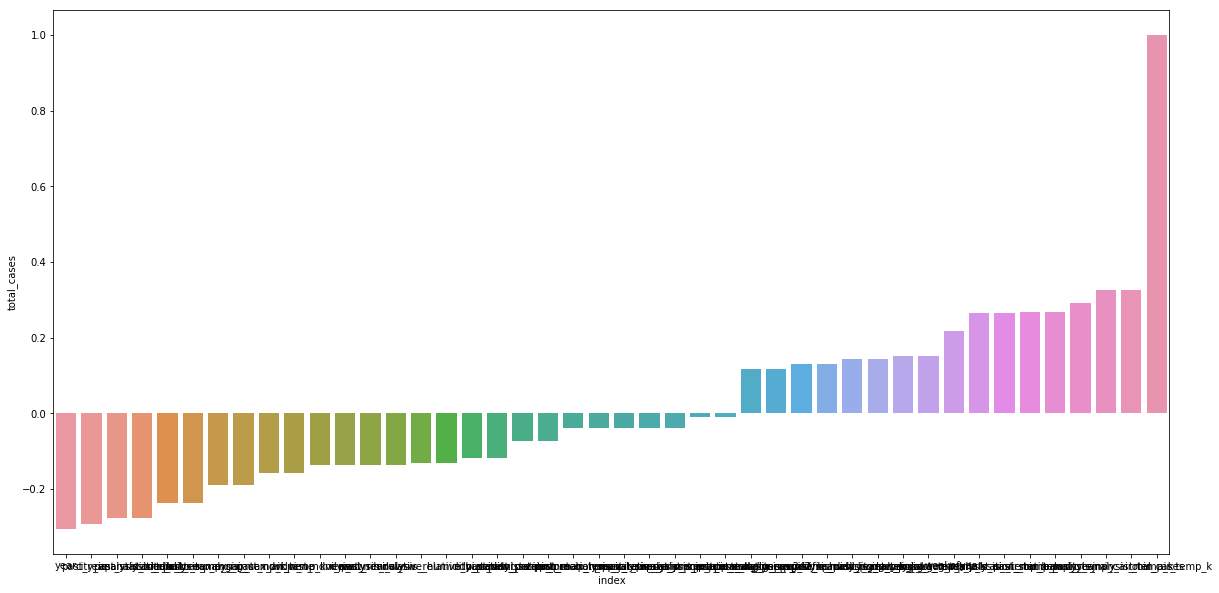

In [25]:
plt.figure(figsize=(20, 10))
corrs_with_total_cases = corr['total_cases'].sort_values().reset_index()

sns.barplot(data=corrs_with_total_cases, x='index', y='total_cases')
# corrs_with_total_cases

# Testing on models

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
list(map(lambda x: x.shape, [X_test, X_train, y_test, y_train]))

[(364, 43), (1092, 43), (364,), (1092,)]

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.12973006107063012

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.36247637000430466

In [29]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.05652276183523664

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.08516483516483517

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7364602588579385

In [32]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(5, 2))
nn.fit(X_train, y_train)
nn.score(X_test, y_test)

/home/sivakar/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-0.2590287205142423

# Doing a Grid Search on Random Forest

In [33]:
# from sklearn.model_selection import GridSearchCV
# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [4,5,6,7,8],
#     'criterion': ['mse', 'mae']
# }
# model = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
# model.fit(X, y)

# Running on unknown data

In [34]:
output = pd.DataFrame()

In [35]:
output = X_new[['city', 'year', 'weekofyear']]

In [36]:
X_new = do_all_transforms(X_new)
X_new.head()

,reanalysis_tdtr_k,past_reanalysis_relative_humidity_percent,station_max_temp_c,station_precip_mm,reanalysis_air_temp_k,past_reanalysis_specific_humidity_g_per_kg,weekofyear,past_reanalysis_max_air_temp_k,ndvi_nw,city_sj,...,past_reanalysis_precip_amt_kg_per_m2,past_station_diur_temp_rng_c,reanalysis_precip_amt_kg_per_m2,past_reanalysis_min_air_temp_k,reanalysis_max_air_temp_k,reanalysis_dew_point_temp_k,past_ndvi_ne,past_station_max_temp_c,city_iq,reanalysis_avg_temp_k
0,3.128571,78.781429,33.3,75.2,298.492857,15.918571,18,301.1,-0.018900,1,...,25.37,7.057143,25.37,296.4,301.1,294.527143,-0.01890,33.3,0,298.550000
1,2.571429,78.230000,30.0,34.3,298.475714,15.791429,19,300.8,-0.012400,1,...,21.83,5.557143,21.83,296.7,300.8,294.395714,-0.01800,30.0,0,298.557143
2,4.428571,78.270000,32.8,3.0,299.455714,16.674286,20,302.2,0.126803,1,...,4.12,7.785714,4.12,296.4,302.2,295.308571,-0.00150,32.8,0,299.357143
3,4.342857,73.015714,33.3,0.3,299.690000,15.775714,21,303.0,-0.019867,1,...,2.20,6.271429,2.20,296.9,303.0,294.402857,0.12605,33.3,0,299.728571
4,3.542857,74.084286,33.3,84.1,299.780000,16.137143,22,302.3,0.039833,1,...,4.36,7.085714,4.36,297.3,302.3,294.760000,0.05680,33.3,0,299.671429


In [37]:
model = forest

In [38]:
model.fit(X, y)
predictions = model.predict(X_new)

In [39]:
predictions = predictions.round()

In [40]:
output['total_cases'] = predictions

In [41]:
output['total_cases'] = pd.to_numeric(output['total_cases'], downcast='integer')

In [42]:
output.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,4
1,sj,2008,19,5
2,sj,2008,20,8
3,sj,2008,21,8
4,sj,2008,22,9


In [43]:
output.to_csv('submission1.csv', index=False)